<div style="  background: linear-gradient(145deg, #0f172a, #1e293b);  border: 4px solid transparent;  border-radius: 14px;  padding: 18px 22px;  margin: 12px 0;  font-size: 26px;  font-weight: 600;  color: #f8fafc;  box-shadow: 0 6px 14px rgba(0,0,0,0.25);  background-clip: padding-box;  position: relative;">  <div style="    position: absolute;    inset: 0;    padding: 4px;    border-radius: 14px;    background: linear-gradient(90deg, #06b6d4, #3b82f6, #8b5cf6);    -webkit-mask:       linear-gradient(#fff 0 0) content-box,       linear-gradient(#fff 0 0);    -webkit-mask-composite: xor;    mask-composite: exclude;    pointer-events: none;  "></div>    <b>INTRODUCTION TO DEEP LEARNING WITH KERAS</b>    <br/>  <span style="color:#9ca3af; font-size: 18px; font-weight: 400;">(Regression)</span></div>

## **Table of Contents**

1. [What is Keras?](#section-1)
2. [Your First Neural Network](#section-2)
3. [Surviving a Meteor Strike (The Workflow)](#section-3)
4. [Conclusion](#conclusion)

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 1. WHAT IS KERAS?</span><br>

### 1.1 `Theano` vs. `Keras`

Before diving into Keras, it is important to understand the landscape of Deep Learning frameworks. Historically, frameworks like **Theano** were used, but they required low-level definitions of mathematical operations. **Keras** revolutionized this by providing a high-level API.

Below is a comparison of the code required to build a simple training loop in Theano versus Keras.

#### Theano (Low-Level, Verbose)

```python
import theano
import theano.tensor as T
import numpy as np

# 1. Data Setup
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype='float32')
outputs = np.array([[0], [1], [1], [1]], dtype='float32')

# 2. Define Symbolic Variables
x = T.matrix('x') # Input features
y = T.matrix('y') # Target labels

# 3. Initialize Weights and Biases (Randomly)
# Hidden Layer (2 inputs -> 2 neurons)
w1 = theano.shared(np.random.randn(2, 2).astype('float32'), name='w1')
b1 = theano.shared(np.zeros(2, dtype='float32'), name='b1')

# Output Layer (2 inputs -> 1 neuron)
w2 = theano.shared(np.random.randn(2, 1).astype('float32'), name='w2')
b2 = theano.shared(np.zeros(1, dtype='float32'), name='b2')

# 4. Define the Graph (Forward Pass)
hidden = T.nnet.sigmoid(T.dot(x, w1) + b1)
prediction = T.nnet.sigmoid(T.dot(hidden, w2) + b2)

# 5. Define Loss and Updates (Gradient Descent)
# Binary Cross-Entropy loss
loss = T.mean(T.nnet.binary_crossentropy(prediction, y))

# Calculate gradients
gw1, gb1, gw2, gb2 = T.grad(loss, [w1, b1, w2, b2])

# Simplified SGD instead of Adam for brevity
learning_rate = 0.1
updates = [
    (w1, w1 - learning_rate * gw1),
    (b1, b1 - learning_rate * gb1),
    (w2, w2 - learning_rate * gw2),
    (b2, b2 - learning_rate * gb2)
]

# 6. Compile Functions
train = theano.function(inputs=[x, y], outputs=loss, updates=updates)
predict = theano.function(inputs=[x], outputs=prediction)

# 7. Training Loop
for epoch in range(500): # Theano needs more epochs than Adam
    current_loss = train(inputs, outputs)

# 8. Test it
print("Prediction for [1, 1]:")
print(predict([[1, 1]]))
```

#### Keras (High-Level, Concise)

> Keras allows you to define the same logic in a fraction of the lines, focusing on layers rather than matrix multiplication math.

In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras.layers import Dense, Input
from keras.models import Sequential
import numpy as np

# 1. simulate a simple OR gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype='float32')
outputs = np.array([[0], [1], [1], [1]], dtype='float32')

# 2. Define model
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# 3. Compile the model 
# binary_crossentropy because we have 1 output node
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train model
model.fit(inputs, outputs, epochs=500, verbose=0)

# 5. Test it
print("Predictions for [1, 1]:")
prediction = model.predict(np.array([[1, 1]]))
print(prediction)

e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Predictions for [1, 1]:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.79436123]]


### 1.2 Key Features of Keras

Keras is a Deep Learning framework written by **François Chollet**. Its primary characteristics are:
- **Enables fast experimentation**: Go from idea to result with the least amount of delay.
- **Runs on top of other frameworks**: Historically Theano/CNTK, now primarily **TensorFlow**.
- **User-Friendly**: Designed for human beings, not machines.

<div style="background: #e0f2fe; border-left: 16px solid #0284c7; padding: 14px 18px; border-radius: 8px; font-size: 18px; color: #075985;"> 💡 <b>Tip:</b> Keras is now the official high-level API of TensorFlow. While TensorFlow handles the low-level tensor operations, Keras provides the building blocks for models.</div>

### 1.3 Why Use Keras?

1.  **Fast industry-ready models**: widely used in production.
2.  **For beginners and experts**: Easy to learn, deep enough to customize.
3.  **Less code**: As seen in the comparison above.
4.  **Build any architecture**: CNNs, RNNs, Transformers, etc.
5.  **Deploy models in multiple platforms**: Mobile, Web, Embedded.

### 1.4 Feature Engineering: `Machine Learning` vs. `Deep Learning`

One of the biggest advantages of Deep Learning (DL) over traditional Machine Learning (ML) is how features are handled.

| Approach | Process |
| :--- | :--- |
| **Machine Learning** | Input $\rightarrow$ **Manual Feature Extraction** $\rightarrow$ Classification $\rightarrow$ Output |
| **Deep Learning** | Input $\rightarrow$ **Feature Extraction + Classification (Combined)** $\rightarrow$ Output |

In Deep Learning, the network learns the features itself (e.g., edges, shapes in images) without the human needing to manually define them.

### 1.5 Unstructured Data

Neural networks excel at handling **unstructured data**.
- **Structured Data**(Rows and Columns): 
    -   `Excel spreadsheets`
    - `SQL databases` 
- **Unstructured Data**: 
    - `Audio waves`
    - `Images`
    - `Video`
    - `Text`

### 1.6 When to use Neural Networks?

You should consider using Deep Learning/Neural Networks when:
1.  You are dealing with **unstructured data** (e.g., Images of cats and dogs).
2.  You **don't need easily interpretable results** (The "Black Box" problem is acceptable).
3.  You can benefit from a **known architecture** (e.g., Convolutional Neural Networks for vision).
---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 2. YOUR FIRST NEURAL NETWORK</span><br>

![image](_img\01\01.png)

### 2.1 Anatomy of a Neural Network

A standard neural network consists of three main types of layers:
1.  **Input Layer**: Receives the raw data.
2.  **Hidden Layer(s)**: Where the computation and feature extraction happen.
3.  **Output Layer**: Produces the final prediction.

#### Parameters

The network learns by adjusting parameters inside the neurons:
*   **Weights ($w$)**: The strength of the connection between neurons.
*   **Biases ($b$)**: An offset value allowing the activation function to shift.

#### Gradient Descent

The learning process involves minimizing a **Cost Function** ($J(w)$).
- Imagine a ball rolling down a valley.
- The bottom of the valley is the **Global Cost Minimum** ($J_{min}(w)$).
- **Gradient Descent** is the algorithm that calculates the slope (gradient) and updates the weights to move the "ball" closer to the minimum.

### 2.2 The Sequential API

The `Sequential` API in Keras is the easiest way to build a model. It allows you to stack layers linearly, one after the other.

**Workflow:**
1.  Initialize `Model`.
2.  Add `Input Layer` / `Hidden Layer`.
3.  Add `Hidden Layer` (Optional).
4.  Add `Output Layer`.

### 2.3 Defining the Network in Code

Let's build a simple network with:
- Input shape of 3 features.
- One hidden layer with 2 neurons.
- One output layer with 1 neuron.

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input

In [3]:
# 1. Create a new sequential model
model = Sequential()

# 2. Add an input and dense layer
model.add(Input(shape=(3,)))
model.add(Dense(2))

# 3. Adding Single neuron layer (Output)
model.add(Dense(1))

### 2.4 Adding Activations

Without activation functions, a neural network is just a linear regression model. Activations introduce non-linearity, allowing the network to learn complex patterns. A common activation function is **ReLU** (Rectified Linear Unit).

In [4]:
# Re-defining the model with activation functions
model = Sequential()

# Add activation="relu" to the hidden layer
model.add(Input(shape=(3,)))
model.add(Dense(2, activation="relu"))

# Output layer (Linear activation by default, suitable for regression)
model.add(Dense(1))


### 2.5 Summarizing the Model
Keras provides a powerful utility `model.summary()` to inspect the architecture and the number of parameters.



In [5]:
# Display the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

#### Understanding the Parameters
Let's break down the parameter count from the summary above:

**Layer 1 (`dense_3`):**
*   Inputs: 3
*   Neurons: 2
*   Weights: $3 \times 2 = 6$
*   Biases: $2$ (one per neuron)
*   **Total**: $6 + 2 = 8$ parameters.

**Layer 2 (`dense_4`):**
*   Inputs: 2 (output from previous layer)
*   Neurons: 1
*   Weights: $2 \times 1 = 2$
*   Biases: $1$
*   **Total**: $2 + 1 = 3$ parameters.

**Total Trainable Parameters**: $8 + 3 = 11$.

---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 3. SURVIVING A METEOR STRIKE (THE WORKFLOW)</span><br>

### 3.1 The Problem Scenario

Imagine a meteor is approaching Earth.
- **Data**: We have time ($t$) and position ($pos$) data.
- **Goal**: Predict the impact region (where position is at $t=0$).
- **Challenge**: We might have data for $t=-40$ to $t=-10$ and $t=+10$ to $t=+40$, but we need to interpolate the danger zone near $t=0$.

**This is a regression problem.**

![image](_img\01\02.png)

Plot saved to meteor_plot.png


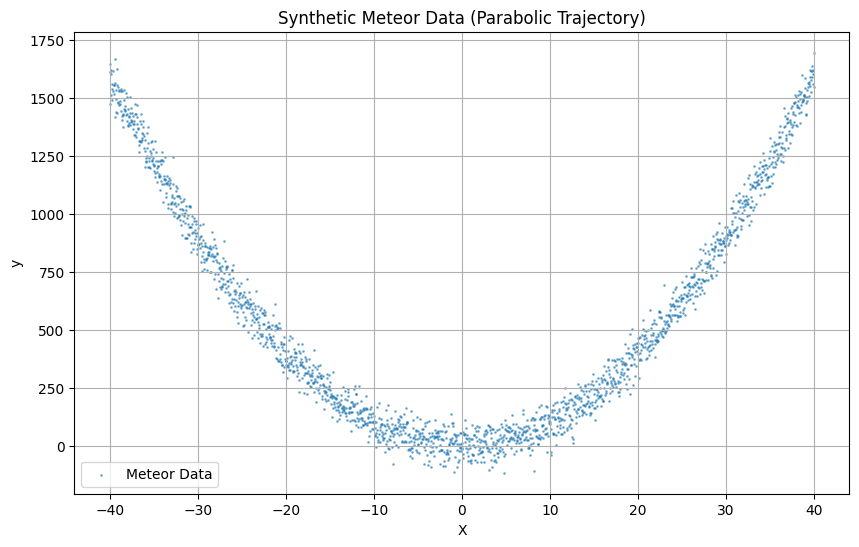

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generating synthetic "Meteor" data (Parabolic trajectory)
X = np.linspace(-40, 40, 2000)
y = X**2 + np.random.normal(0, 50, 2000) # Adding some noise -> y = x^2 + noise

# Normalizing data for better neural network performance (though not strictly needed for just vis)
X_norm = X / 40.0
y_norm = y / 1600.0

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=1, alpha=0.5, label='Meteor Data')
plt.title('Synthetic Meteor Data (Parabolic Trajectory)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('meteor_plot.png')
print("Plot saved to meteor_plot.png")

In [7]:
# 2. Correct Split Logic for "Surviving a Meteor Strike" 
# The scenario states we have data for t=-40 to -10 and t=10 to 40.
# We need to predict t=0 (and the surrounding danger zone).

# Indices for the "Danger Zone" (gap)
# Gap is -10 to 10 => X_norm range -0.25 to 0.25.
gap_mask = (X_norm > -0.25) & (X_norm < 0.25)

X_test = X_norm[gap_mask]    # The missing gap we want to predict
y_test = y_norm[gap_mask]

X_train = X_norm[~gap_mask]  # The outer regions we have data for
y_train = y_norm[~gap_mask]

print(f"Training samples (Outer): {len(X_train)}")
print(f"Testing samples (Danger Zone): {len(X_test)}")

Training samples (Outer): 1500
Testing samples (Danger Zone): 500


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Input

# 3. Define Model
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 4. Train
# We train ONLY on the outer data
print("Starting training on outer data...")
history = model.fit(X_train, y_train, epochs=20, verbose=1, batch_size=32)

Starting training on outer data...
Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0789  
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0194
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0097
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0041
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013
Epoch 11/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012
Epoch 12/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012
Epoch 13/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012
Epoch 14/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011    
Epoch 15/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [10]:
# 5. Evaluate on the Gap
loss = model.evaluate(X_test, y_test)
print(f"Test Set Loss (MSE) on Danger Zone: {loss}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025     
Test Set Loss (MSE) on Danger Zone: 0.002499458845704794



<div style="background: #e0f2fe; border-left: 16px solid #0284c7; padding: 14px 18px; border-radius: 8px; font-size: 18px; color: #075985;"> 💡 <b>Tip:</b> In a real "Meteor" scenario, a low MSE implies our trajectory calculation is accurate, potentially saving the Earth by predicting the exact impact time and location!</div>

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


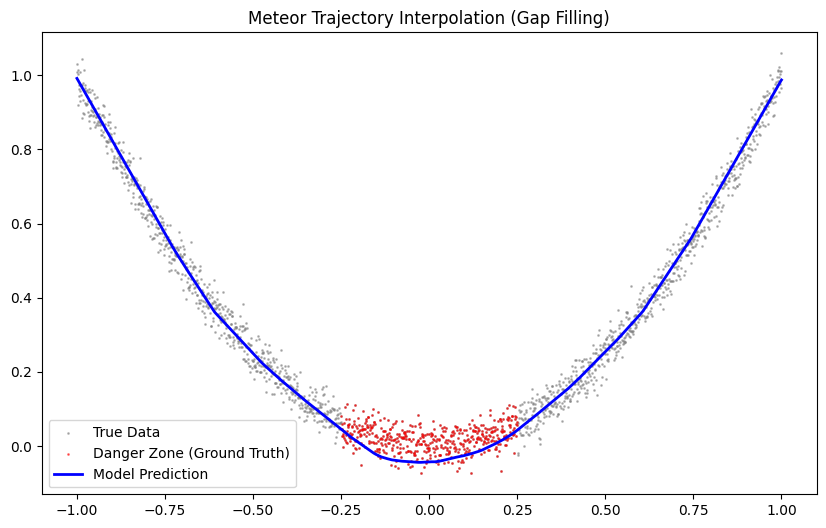

In [11]:
# 6. Visualize Prediction vs Truth
predictions = model.predict(X_norm)

plt.figure(figsize=(10, 6))
plt.scatter(X_norm, y_norm, s=1, color='gray', alpha=0.5, label='True Data')
plt.scatter(X_test, y_test, s=1, color='red', alpha=0.5, label='Danger Zone (Ground Truth)')
plt.plot(X_norm, predictions, color='blue', linewidth=2, label='Model Prediction')
plt.legend()
plt.title("Meteor Trajectory Interpolation (Gap Filling)")
plt.show()

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 4. CONCLUSION</span><br>

In this notebook, we covered the fundamentals of Deep Learning with Keras:

1.  **Keras vs. Theano**: We saw how Keras simplifies the creation of neural networks, abstracting complex math into simple layers.
2.  **Neural Network Architecture**: We learned about Input, Hidden, and Output layers, as well as Weights and Biases.
3.  **The Keras Workflow**:
    - **Define**: `Sequential()`, `Dense()`.
    - **Compile**: `optimizer='adam'`, `loss='mse'`.
    - **Fit**: Training the model with data.
    - **Predict**: Generating outputs for new data.
    - **Evaluate**: Checking the model's accuracy.

**Next Steps:**
- Experiment with changing the number of neurons or layers.
- Try different activation functions (e.g., `sigmoid`, `tanh`).
- Apply this workflow to a classification problem (e.g., classifying images instead of predicting numbers).
